min (4-2.1 x1^2 + 1/3 x1^4 ) x1^2 + x1x2 + (-4 + 4x2^2 )x2^2

xn(k + 1) = xn(k) - @ df(x(k))/dxn, n = 1 ..N

f(x) = 4x1^2 -2,1x1^4 + 1/3x1^6 + x2x1 -4 x2^2 + 4x2^4
dx1 = 8x1 - 8.4x1^3 + 2x1^5 + x2
dx2 = x1 - 8x2 + 16x2^3

In [93]:
def f(x1, x2):
    return (4 - 2.1 * x1**2 + (1/3) * x1**4) * x1**2 + x2 * x1 + (-4 + 4 * x2**2) * x2**2
def dx1(x1, x2):
    return 2 * 2 * x1 - 2.1* 4 * x1**3 + (1/3) * 6 * x1**5 + x2
def dx2(x1, x2):
    return x1 - 4 * 2 * x2 + 4 * 4 * x2**3

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f(0,0)

0.0

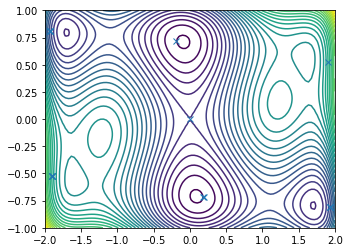

In [118]:
n = 100
x = np.linspace(-2, 2, n)
y = np.linspace(-1, 1, n)
 
X, Y = np.meshgrid(x, y)
# Z = np.sqrt(X**2 + Y**2)
Z = f(X, Y)
 
#
# meshgrid で作った X と Y、そして高さ Z を contour に渡す
#
plt.contour(X, Y, Z,40)

ax = plt.gca()
# ax.set_aspect('equal')
# ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])  )
ax.set_aspect(1.5)
plt.plot([x[0] for x in xx], [x[1]for x in xx], 'x')
plt.plot([x[0] for x in yy], [x[1]for x in yy], 'o')
plt.show()

In [59]:
(ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])

2.0

In [64]:
print(f(0.08984, -0.71266))
print(f(-0.08984, 0.71266))

-1.0316284533608835
-1.0316284533608835


In [65]:
f(0,0)

0.0

最急降下法のアルゴリズム

講義資料で説明した最急降下法のアルゴリズムを以下に示す。

最急降下法

1. 更新幅 α,最大ステップ数 kmax,初期点 x(0) を与える。k = 0 として,手順 2 に進む。

2. 次式にしたがって,探索点 x を更新する。

xn(k + 1) = xn(k) − α

∂ f(x(k))

∂xn

, n = 1, . . . , N (2)

3. k = kmax であれば終了する。そうでなければ,k ← k + 1 として,手順 2 に戻る。

3 課題

Six-hump Camelback 関数最小化問題 (1) を最急降下法を用いて解き,講義資料で示した図と同じような

探索軌道を示しなさい。ただし,初期点は図 1 の端点 (−2, −1), (−2, −0.5), . . . , (−2, 1), (−1, −1), . . . , (2, 1)

の 25 点(講義資料参照)とする。ステップ幅は α = 0.01 を推奨する。最急降下法の実装には NumPy を

用い,結果(探索軌道)の出力には Matplotlib を用いること。

In [24]:
import copy
# (−2, −1), (−2, −0.5), . . . , (−2, 1), (−1, −1), . . . , (2, 1)

In [107]:
point = []
for x1 in np.arange(-2, 2, 1):
    for x2 in np.arange(-1,1,.5):
        point.append([x1, x2])
print(np.array(point))

[[-2.  -1. ]
 [-2.  -0.5]
 [-2.   0. ]
 [-2.   0.5]
 [-1.  -1. ]
 [-1.  -0.5]
 [-1.   0. ]
 [-1.   0.5]
 [ 0.  -1. ]
 [ 0.  -0.5]
 [ 0.   0. ]
 [ 0.   0.5]
 [ 1.  -1. ]
 [ 1.  -0.5]
 [ 1.   0. ]
 [ 1.   0.5]]


In [124]:
dx = [dx1, dx2]
yy = []
xx = []
for px in point:
    y = []
    x = copy.deepcopy(px)
    print(x)
    for k in range(100):
        for n in range(2):
            print(x)
            x[n] = (x - 0.01 * dx[n](*x))[n]
            y.append(x)
    print(x)
    xx.append(x)
    break
#     print(np.array(y))
    yy.append(y)

[-2, -1.0]
[-2, -1.0]
[-1.9419999999999999, -1.0]
[-1.9419999999999999, -0.90057999999999994]
[-1.9181007060199353, -0.90057999999999994]
[-1.9181007060199353, -0.83657974358378273]
[-1.9065282509259429, -0.83657974358378273]
[-1.9065282509259429, -0.79076189007235775]
[-1.9006886647530352, -0.79076189007235775]
[-1.9006886647530352, -0.75590125655797635]
[-1.8977668991818313, -0.75590125655797635]
[-1.8977668991818313, -0.72828977900007574]
[-1.8963837822073106, -0.72828977900007574]
[-1.8963837822073106, -0.70578284027886895]
[-1.8958181004048342, -0.70578284027886895]
[-1.8958181004048342, -0.68703589526467446]
[-1.8956811826714504, -0.68703589526467446]
[-1.8956811826714504, -0.67115499025719749]
[-1.8957613918213629, -0.67115499025719749]
[-1.8957613918213629, -0.65751839823713709]
[-1.8959438071619719, -0.65751839823713709]
[-1.8959438071619719, -0.64567799665466463]
[-1.8961668964931071, -0.64567799665466463]
[-1.8961668964931071, -0.63530125454751574]
[-1.8963986113116171, -0.6

In [123]:
yy[0]

[[-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089

In [97]:
dx[1](1,1)

9

In [69]:
xx

[array([-1.58789391, -0.58789391]),
 array([-0.67651902,  0.82348098]),
 array([-1.27544654,  0.72455346]),
 array([-1.70379174,  0.79620826]),
 array([ -1.55504993e-12,  -1.55504993e-12]),
 array([ 0.0994196,  0.5994196]),
 array([-0.23561008,  0.76438992]),
 array([-0.67651902,  0.82348098]),
 array([ 0.23561008, -0.76438992]),
 array([-0.0994196, -0.5994196]),
 array([ 0.,  0.]),
 array([ 0.0994196,  0.5994196]),
 array([ 1.27544654, -0.72455346]),
 array([ 0.67651902, -0.82348098]),
 array([ 0.23561008, -0.76438992]),
 array([-0.0994196, -0.5994196])]

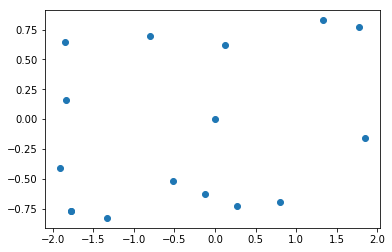

In [95]:
plt.plot([x[0] for x in xx], [x[1]for x in xx], 'o')
plt.show()

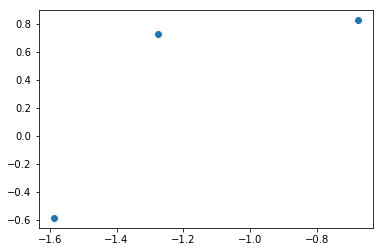

In [79]:
plt.plot([xx[0][0], xx[1][0], xx[2][0]], [xx[0][1], xx[1][1], xx[2][1]], 'o')
plt.show()